## Exercise
At the same level as this notebook on github, there is an Exercise folder that contains carprices.csv. This file has car sell prices for 3 different models. First plot data points on a scatter plot chart to see if linear regression model can be applied. If yes, then build a model that can answer following questions,

1) Predict price of a mercedez benz that is 4 yr old with mileage 45000

2) Predict price of a BMW X5 that is 7 yr old with mileage 86000

3) Tell me the score (accuracy) of your model. (Hint: use LinearRegression().score())

In [5]:
import pandas as pd
import seaborn as sns

In [2]:
data = pd.read_csv('C:\\Users\\Lumia520\\Desktop\\Datasets\\carprices.csv')
data

,Car Model,Mileage,Sell Price($),Age(yrs)
0,BMW X5,69000,18000,6
1,BMW X5,35000,34000,3
2,BMW X5,57000,26100,5
3,BMW X5,22500,40000,2
4,BMW X5,46000,31500,4
5,Audi A5,59000,29400,5
6,Audi A5,52000,32000,5
7,Audi A5,72000,19300,6
8,Audi A5,91000,12000,8
9,Mercedez Benz C class,67000,22000,6


<Axes: xlabel='Age(yrs)', ylabel='Sell Price($)'>

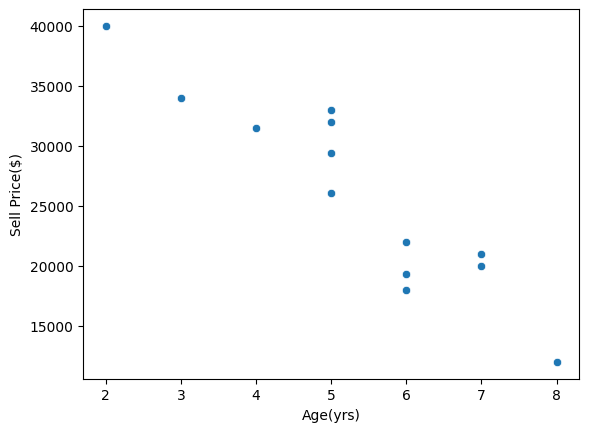

In [31]:
sns.scatterplot(data, x = 'Age(yrs)', y = 'Sell Price($)')

<Axes: xlabel='Mileage', ylabel='Sell Price($)'>

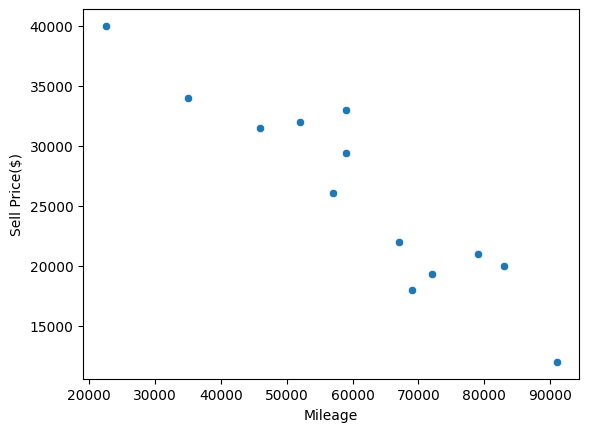

In [9]:
sns.scatterplot(data, x = 'Mileage', y = 'Sell Price($)')

we can use linear regression as the data somewhat forms a straight line in both cases above

In [10]:
# converting categorical variable using dummy variables

dummies = pd.get_dummies(data['Car Model'])
dummies

,Audi A5,BMW X5,Mercedez Benz C class
0,False,True,False
1,False,True,False
2,False,True,False
3,False,True,False
4,False,True,False
5,True,False,False
6,True,False,False
7,True,False,False
8,True,False,False
9,False,False,True


joining both dataframes

In [12]:
merged = pd.concat([data,dummies], axis = 'columns')
merged

,Car Model,Mileage,Sell Price($),Age(yrs),Audi A5,BMW X5,Mercedez Benz C class
0,BMW X5,69000,18000,6,False,True,False
1,BMW X5,35000,34000,3,False,True,False
2,BMW X5,57000,26100,5,False,True,False
3,BMW X5,22500,40000,2,False,True,False
4,BMW X5,46000,31500,4,False,True,False
5,Audi A5,59000,29400,5,True,False,False
6,Audi A5,52000,32000,5,True,False,False
7,Audi A5,72000,19300,6,True,False,False
8,Audi A5,91000,12000,8,True,False,False
9,Mercedez Benz C class,67000,22000,6,False,False,True


now drop 'Car Model' and 'Mercedez Benz C class'

In [20]:
final = merged.drop(['Car Model', 'Mercedez Benz C class'], axis='columns')
final

,Mileage,Sell Price($),Age(yrs),Audi A5,BMW X5
0,69000,18000,6,False,True
1,35000,34000,3,False,True
2,57000,26100,5,False,True
3,22500,40000,2,False,True
4,46000,31500,4,False,True
5,59000,29400,5,True,False
6,52000,32000,5,True,False
7,72000,19300,6,True,False
8,91000,12000,8,True,False
9,67000,22000,6,False,False


In [21]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [23]:
X = final.drop(['Sell Price($)'], axis='columns')
X

,Mileage,Age(yrs),Audi A5,BMW X5
0,69000,6,False,True
1,35000,3,False,True
2,57000,5,False,True
3,22500,2,False,True
4,46000,4,False,True
5,59000,5,True,False
6,52000,5,True,False
7,72000,6,True,False
8,91000,8,True,False
9,67000,6,False,False


In [25]:
y = final['Sell Price($)']
y

0     18000
1     34000
2     26100
3     40000
4     31500
5     29400
6     32000
7     19300
8     12000
9     22000
10    20000
11    21000
12    33000
Name: Sell Price($), dtype: int64

In [26]:
model.fit(X,y)

LinearRegression()

now making predictions

In [27]:
model.predict([[45000,4,0,0]])

c:\Users\Lumia520\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([36991.31721061])

In [28]:
model.predict([[86000,7,0,1,]])

c:\Users\Lumia520\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([11080.74313219])

calculating the accuracy of the model

In [30]:
model.score(X,y)

0.9417050937281083